In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df=pd.read_csv('car+data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [11]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [13]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [14]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [15]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [19]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [20]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
pred=model.predict(x_test)

In [24]:
pred

array([-0.80573113,  4.4339242 ,  3.35690188,  2.12758952, 10.68869761,
        3.89725454,  1.8502064 ,  4.17302045,  3.4934277 ,  1.96661239,
        6.75500525,  2.7017356 ,  3.45429369,  0.27507744, 16.45284041,
        0.07770437,  9.30830418, -0.68954858,  0.68249716,  9.27730036,
        6.32188493,  4.27942909,  0.47397559,  0.79121574,  2.53338139,
        6.16371024,  4.15879012,  4.28900188, -0.63552961,  2.92396571,
        3.42404214, 10.47140303,  0.56743208,  7.93892849,  5.64570402,
        3.88565528,  3.65257533,  5.91297796,  2.29421395,  8.85197127,
        1.4322049 ,  1.38329687, -0.37080777,  8.74170955,  0.09562062,
       16.04017195,  8.42405914,  4.77424912, 14.25289012,  0.9009579 ,
        4.7739207 ,  0.18696593,  3.73012033,  0.97027361, 17.88036188,
        8.11517015,  1.10085675,  4.37816017,  1.29679806,  6.14112831,
        5.37878282])

In [25]:
y_test

148     0.52
291     5.40
173     0.40
104     1.35
97     17.00
       ...  
135     0.65
220     3.50
118     1.10
272     7.50
6       6.75
Name: Selling_Price, Length: 61, dtype: float64

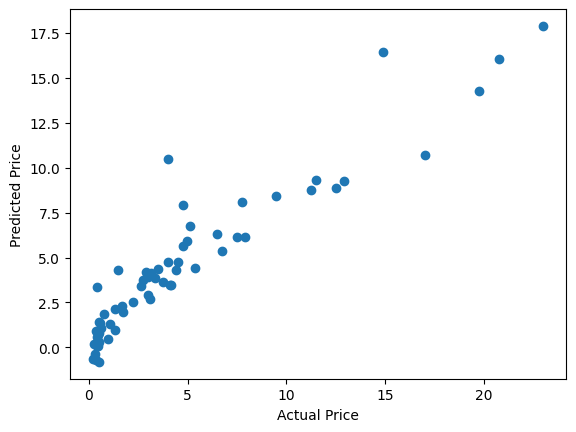

In [26]:
plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [28]:
mae=metrics.mean_absolute_error(y_test,pred)
print('Mean Absolute Error:',mae)

Mean Absolute Error: 1.3572472930951482
